In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,ConfusionMatrixDisplay

In [7]:
df = pd.read_csv('Social_Network_Ads - Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.drop(columns=['User ID'],inplace=True)

In [10]:
le = LabelEncoder()

In [11]:
df['Gender'] = le.fit_transform(df['Gender'])

In [12]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [13]:
X = df[['Gender', 'Age', 'EstimatedSalary']]

In [14]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [15]:
y = df['Purchased']

In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [18]:
sc = StandardScaler()

In [19]:
X_train = sc.fit_transform(X_train)

In [20]:
X_test = sc.transform(X_test)

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [25]:
acc = accuracy_score(y_test,y_pred)
acc

0.8375

In [26]:
error_rate = 1 - acc
error_rate

0.16249999999999998

In [27]:
pre = precision_score(y_test,y_pred)
pre

0.8461538461538461

In [28]:
rec = recall_score(y_test,y_pred)
rec

0.7096774193548387

In [29]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[45,  4],
       [ 9, 22]])

In [30]:
desc = ConfusionMatrixDisplay(cm)

In [31]:
import matplotlib.pyplot as plt

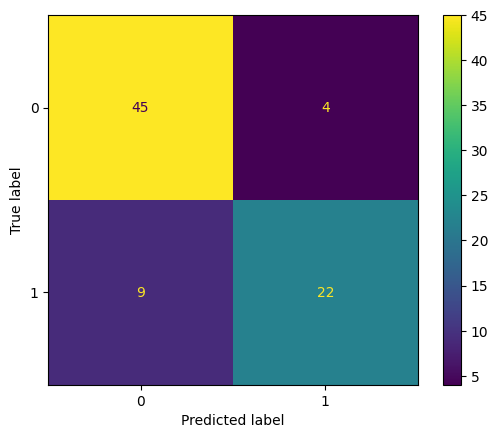

In [32]:
desc.plot()

In [33]:
TP,FP,TN,FN = confusion_matrix(y_test,y_pred).ravel()

In [34]:
TP = int(TP)

In [35]:
TP

45

In [36]:
FP = int(FP)

In [37]:
FP

4

In [38]:
TN = int(TN)

In [39]:
TN

9

In [40]:
FN = int(FN)

In [41]:
FN

22